In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#from scipy.stats import norm
import scipy.stats as stats
from scipy.stats import shapiro, normaltest, kstest, norm

## Read raw data _(.csv file)_

In [2]:
#data_file_to_load = "ampt_20250828.csv"
data_file_to_load ="ampt_20250917n.csv"

In [3]:
df = pd.read_csv(f'./CSV/{data_file_to_load}')

Assuming that this timestamp is in milliseconds  
Format the timestamp column

In [4]:
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')

In [5]:
df['timestamp'][0]

Timestamp('2025-09-17 08:39:45.619000')

In [6]:
# Transformer en format hh;mn;ss
#df["timestamp"] = df["timestamp"].dt.strftime("%H:%M:%S")

In [7]:
# Tronquer à la seconde
df["timestamp"] = df["timestamp"].dt.floor("s")

In [8]:
df['timestamp'][0]

Timestamp('2025-09-17 08:39:45')

In [9]:
#df.head()
#df.iloc[269]  # affiche une ligne localisée par son index
df.sample(2) # affiche deux ligne aléatoirement

,timestamp,OutDCA_1,OutDCV_1,In1DCV_1,In2DCV_1,DCWh_1,In1DCA_1,In2DCA_1,OutDCA_2,OutDCV_2,...,DCWh_5,In1DCA_5,In2DCA_5,OutDCA_46,OutDCV_6,In1DCV_6,In2DCV_6,DCWh_6,In1DCA_6,In2DCA_6
51,2025-09-17 08:50:16,0.000,747,591,596,0,0.007,0.000,0.000,750,...,0,0.006,-0.001,NaN,746,512,521,0,4.375,3.517
390,2025-09-17 10:40:31,0.108,741,584,587,0,0.092,0.065,0.666,743,...,0,0.162,0.181,NaN,739,490,507,0,6.912,5.577


__Scenario 1__ : series OutDCV

In [10]:
# Transform dataframe into series
serie1 = df.set_index("timestamp")["OutDCV_1"]
serie2 = df.set_index("timestamp")["OutDCV_2"]
serie3 = df.set_index("timestamp")["OutDCV_3"]
serie4 = df.set_index("timestamp")["OutDCV_4"]
serie5 = df.set_index("timestamp")["OutDCV_5"]
serie6 = df.set_index("timestamp")["OutDCV_6"]

# Les réunir dans un DataFrame
df_OutDCV = pd.concat([serie1, serie2, serie3, serie4, serie5, serie6], axis=1)


In [11]:
df_OutDCV.sample(2)

,OutDCV_1,OutDCV_2,OutDCV_3,OutDCV_4,OutDCV_5,OutDCV_6
timestamp,,,,,,
2025-09-17 09:15:17,747,749,749,749,749,745
2025-09-17 10:35:41,741,743,743,743,743,740


### Trace d'une serie ( à partir du dataframe )

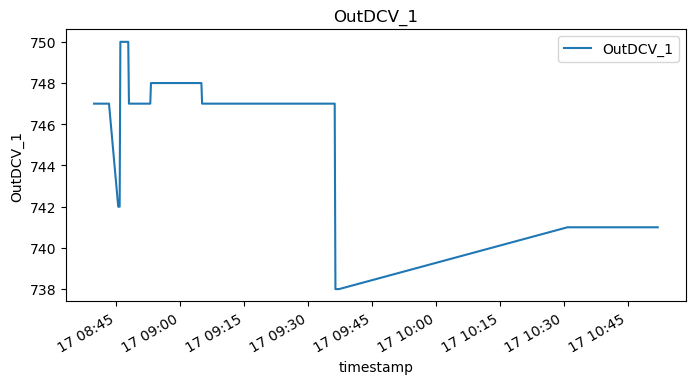

In [12]:
    # Tracé de la dataframe
df_OutDCV["OutDCV_1"].plot(figsize=(8,4), title="OutDCV_1")
plt.xlabel("timestamp")
plt.ylabel("OutDCV_1")
plt.legend()
#plt.grid(True)
plt.show()

### Trace d'une série ( VS trace dataframe )

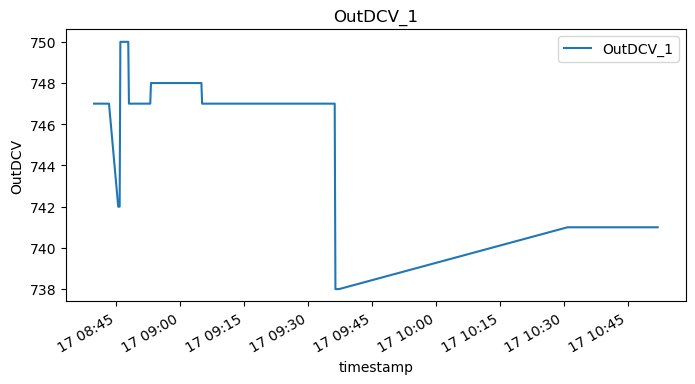

In [13]:
# Tracer la série
serie1.plot(figsize=(8,4), title="OutDCV_1")
plt.xlabel("timestamp")
plt.ylabel("OutDCV")
plt.legend()
#plt.grid(True)
plt.show()

### Tracé de plusieurs series sur une même courbe

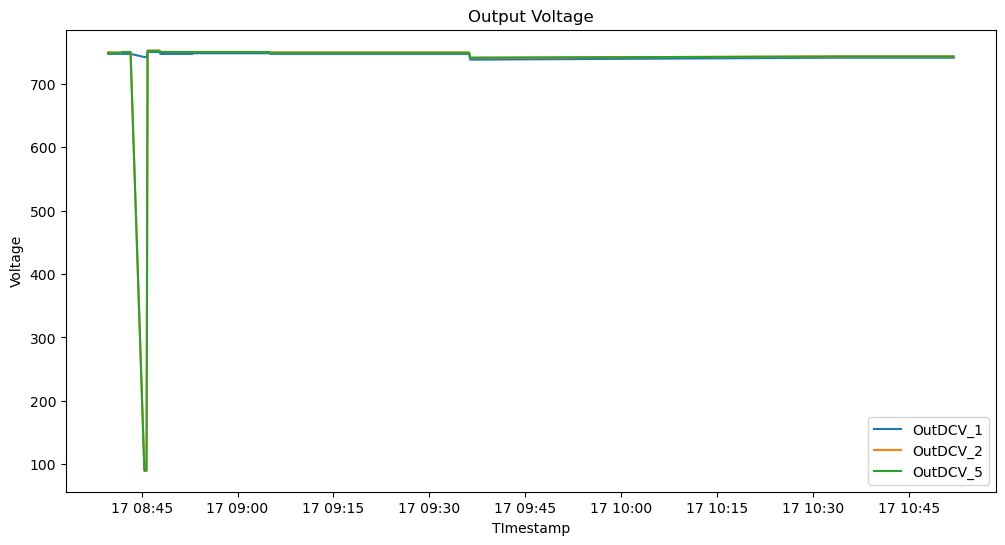

In [14]:
# Définir une figure plus large (12 pouces de large, 6 de haut)
plt.figure(figsize=(12, 6))

# Tracer plusieurs courbes
plt.plot(serie1, label="OutDCV_1")
plt.plot(serie2, label="OutDCV_2")
#plt.plot(serie3, label="OutDCV_3")
#plt.plot(serie1, label="OutDCV_4")
plt.plot(serie2, label="OutDCV_5")
#plt.plot(serie3, label="OutDCV_6")

# Personnalisation
plt.title("Output Voltage")
plt.xlabel("TImestamp")
plt.ylabel("Voltage")
plt.legend()
#plt.grid(True)

# Affichage
plt.show()

## Afficher la loi normale d’une colonne d’un DataFrame
  Tracer l’histogramme des données (pour voir leur distribution).  
  Superposer la courbe de densité normale théorique (calculée à partir de la moyenne et de l’écart-type de la colonne).  
  Résultat : histogramme de ta colonne et la courbe rouge représentant la loi normale ajustée à tes données.  
  les limites ±3σ (règle des 3 sigmas, soit ~99.7% des données) est utile pour voir les valeurs extrêmes ou outliers

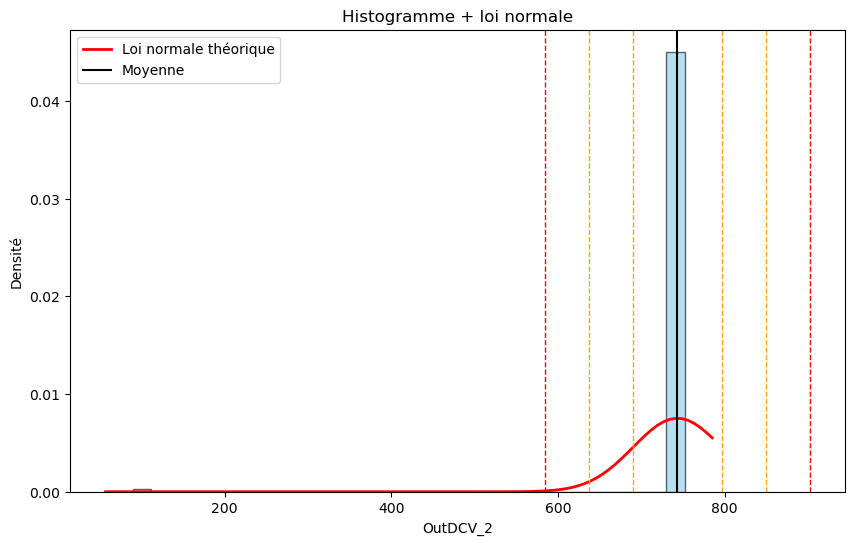

In [15]:
# Moyenne et écart-type
mu, sigma = df["OutDCV_2"].mean(), df["OutDCV_2"].std()

# Histogramme
plt.figure(figsize=(10,6))
plt.hist(df["OutDCV_2"], bins=30, density=True, alpha=0.6, color="skyblue", edgecolor="black")

# Courbe de loi normale théorique
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, "r", linewidth=2, label="Loi normale théorique")

# Limites 3 sigma
for k, couleur in zip([-3, -2, -1, 1, 2, 3], ["red","orange","orange","orange","orange","red"]):
    plt.axvline(mu + k*sigma, color=couleur, linestyle="--", linewidth=1)

# Ligne centrale (moyenne)
plt.axvline(mu, color="black", linestyle="-", linewidth=1.5, label="Moyenne")

plt.title("Histogramme + loi normale")
plt.xlabel("OutDCV_2")
plt.ylabel("Densité")
plt.legend()
plt.show()

## vérifier si les données suivent vraiment une loi normale  
Q-Q plot (Quantile-Quantile plot) est une méthode visuelle pour comparer tes données avec une loi normale théorique.  
Comment lire le Q-Q plot :  
Si les points suivent bien la diagonale rouge → les données sont proches d’une loi normale.  
Si les points s’écartent fortement → distribution non normale (asymétrie, aplatissement, etc.).

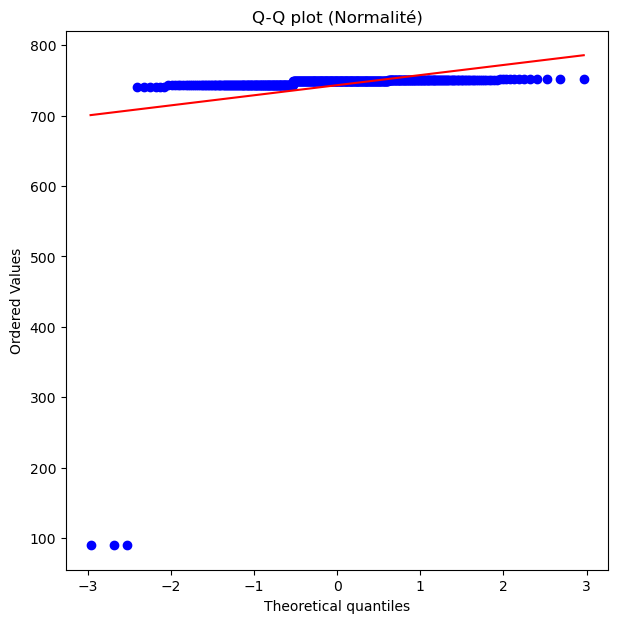

In [16]:
data = df["OutDCV_2"]
# Q-Q Plot
plt.figure(figsize=(7,7))
stats.probplot(data, dist="norm", plot=plt)
plt.title("Q-Q plot (Normalité)")
plt.show()

## Script complet qui :  
Trace l’histogramme avec la courbe de la loi normale théorique.  
Fait un Q-Q plot.  
Effectue les tests statistiques de normalité (Shapiro, D’Agostino-Pearson et KS).  

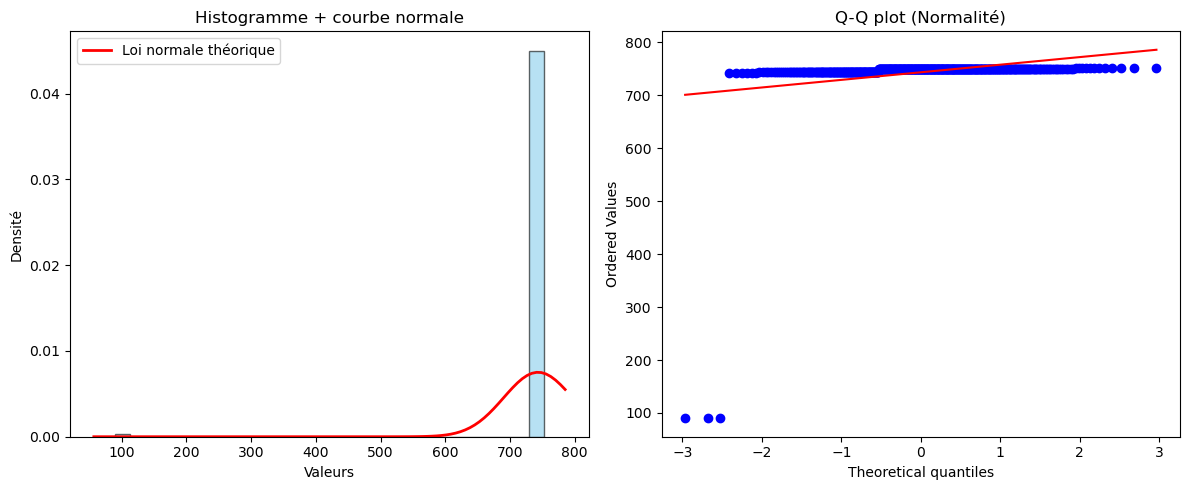

=== Tests de normalité ===
Shapiro-Wilk : stat=0.076, p=0.000
D’Agostino-Pearson : stat=855.151, p=0.000
Kolmogorov-Smirnov : stat=0.479, p=0.000


In [17]:
data = df["OutDCV_2"]

# ------------------------
# 1. Histogramme + loi normale
# ------------------------
mu, sigma = data.mean(), data.std()
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.hist(data, bins=30, density=True, alpha=0.6, color="skyblue", edgecolor="black")

# Courbe de loi normale
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, "r", linewidth=2, label="Loi normale théorique")
plt.title("Histogramme + courbe normale")
plt.xlabel("Valeurs")
plt.ylabel("Densité")
plt.legend()
# ------------------------
# 2. Q-Q plot
# ------------------------
plt.subplot(1,2,2)
stats.probplot(data, dist="norm", plot=plt)
plt.title("Q-Q plot (Normalité)")

plt.tight_layout()
plt.show()

# ------------------------
# 3. Tests de normalité
# ------------------------
print("=== Tests de normalité ===")

# Shapiro-Wilk
stat, p = shapiro(data)
print("Shapiro-Wilk : stat=%.3f, p=%.3f" % (stat, p))
# D’Agostino-Pearson
stat, p = normaltest(data)
print("D’Agostino-Pearson : stat=%.3f, p=%.3f" % (stat, p))

# Kolmogorov-Smirnov
stat, p = kstest(data, 'norm', args=(mu, sigma))
print("Kolmogorov-Smirnov : stat=%.3f, p=%.3f" % (stat, p))

# Recherche d'anomalie sur la serie temporelle
## Détection par Z-score

Détection de valeurs qui s’écartent de plus de 3 σ de la moyenne

La méthode .std() de pandas calcule l’écart-type (standard deviation en anglais) de la Series df_OutDCV[OutDCV_x].


Qu’est-ce que l’écart-type ?  
C’est une mesure de la dispersion des valeurs par rapport à la moyenne.  
Plus l’écart-type est grand → plus les données sont dispersées.  
Plus il est petit → plus les données sont concentrées autour de la moyenne.  

In [26]:
OutDCV_x = "OutDCV_2"
# Détection par Z-score
mean = df_OutDCV[OutDCV_x].mean()
std = round(df_OutDCV[OutDCV_x].std(),2)
print("Moyenne : ",mean,"V, Ecart-type : ",std,"V")

df_OutDCV["OutDCV_z_anomaly_1"] = (df_OutDCV[OutDCV_x] - mean) / std
#df_OutDCV.sample(2)

df_OutDCV["OutDCV_z_anomaly_1"] = df_OutDCV["OutDCV_z_anomaly_1"].apply(lambda x: abs(x) > 3)

Moyenne :  743.25 V, Ecart-type :  53.07 V


Trouver les lignes où une colonne est True

In [27]:
df_OutDCV[df_OutDCV["OutDCV_z_anomaly_1"] == True]

,OutDCV_1,OutDCV_2,OutDCV_3,OutDCV_4,OutDCV_5,OutDCV_6,OutDCV_z_anomaly_1
timestamp,,,,,,,
2025-09-17 08:45:25,742,90,742,742,745,752,True
2025-09-17 08:45:35,742,90,742,742,745,752,True
2025-09-17 08:45:45,742,90,742,742,745,752,True


In [24]:
print("Mean : ",mean)
print("Ecart Type : ", std)
df_OutDCV[["OutDCV_z_anomaly_1"]][0:5]

Mean :  743.25
Ecart Type :  53.07


,OutDCV_z_anomaly_1
timestamp,
2025-09-17 08:39:45,0.108347
2025-09-17 08:39:55,0.108347
2025-09-17 08:40:05,0.108347
2025-09-17 08:40:15,0.108347
2025-09-17 08:40:25,0.108347


### Création de défauts

In [20]:
# 🔹 Modifier la valeur à la 2ème ligne (position 1) et 1ère colonne (position 0) -> à partir de lindex timestamp
df_OutDCV.loc["2025-08-28 06:09:30", "OutDCV_1"] = -10

In [21]:
# 🔹 Modifier la valeur à la 3ème ligne (position 2) et 1ère colonne (position 0) -> à partir de l'index numerique de la position
df_OutDCV.iloc[2, 0] = 650

Lecture des 5 premieres lignes pour vérifier l'ecritre des défauts

In [22]:
df_OutDCV["OutDCV_1"][0:5]

timestamp
2025-09-17 08:39:45    747.0
2025-09-17 08:39:55    747.0
2025-09-17 08:40:05    650.0
2025-09-17 08:40:15    747.0
2025-09-17 08:40:25    747.0
Name: OutDCV_1, dtype: float64

Visualisation des défauts sur une courbe reduite

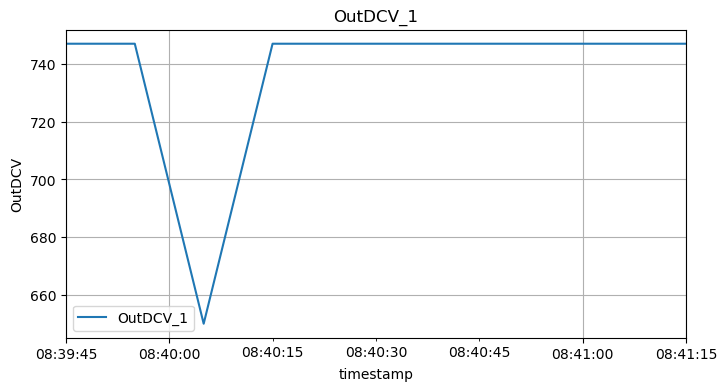

In [23]:
    # Tracé d'une partie la dataframe (Anomalie)
df_OutDCV["OutDCV_1"][0:10].plot(figsize=(8,4), title="OutDCV_1")
#plt.xlabel("timestamp")
plt.ylabel("OutDCV")
plt.legend()
plt.grid(True)
plt.show()

Nouvelle detection par z-score ( apres insertion erreurs )

In [24]:
df_OutDCV["OutDCV_z_anomaly_1"] = df_OutDCV["z_score_1"] = (df_OutDCV["OutDCV_1"] - mean) / std
df_OutDCV["OutDCV_z_anomaly_1"] = df_OutDCV["z_score_1"].apply(lambda x: abs(x) > 3)

In [25]:
df_OutDCV[["OutDCV_1", "OutDCV_z_anomaly_1","z_score_1"]][0:5]

,OutDCV_1,OutDCV_z_anomaly_1,z_score_1
timestamp,,,
2025-09-17 08:39:45,747.0,False,0.070658
2025-09-17 08:39:55,747.0,False,0.070658
2025-09-17 08:40:05,650.0,False,-1.757040
2025-09-17 08:40:15,747.0,False,0.070658
2025-09-17 08:40:25,747.0,False,0.070658


Trouver les lignes où une colonne est True

In [26]:
df_OutDCV[df_OutDCV["OutDCV_z_anomaly_1"] == True]

,OutDCV_1,OutDCV_2,OutDCV_3,OutDCV_4,OutDCV_5,OutDCV_6,z_score_1,OutDCV_z_anomaly_1
timestamp,,,,,,,,
2025-08-28 06:09:30,-10.0,NaN,NaN,NaN,NaN,NaN,-14.192929,True


### Anomalies : Results

In [27]:
df_OutDCV.loc[
    df_OutDCV["OutDCV_z_anomaly_1"] == True,
    ["OutDCV_z_anomaly_1", "OutDCV_1", "z_score_1"]
]


,OutDCV_z_anomaly_1,OutDCV_1,z_score_1
timestamp,,,
2025-08-28 06:09:30,True,-10.0,-14.192929


Trace with anomalies

KeyError: 'timestamp'

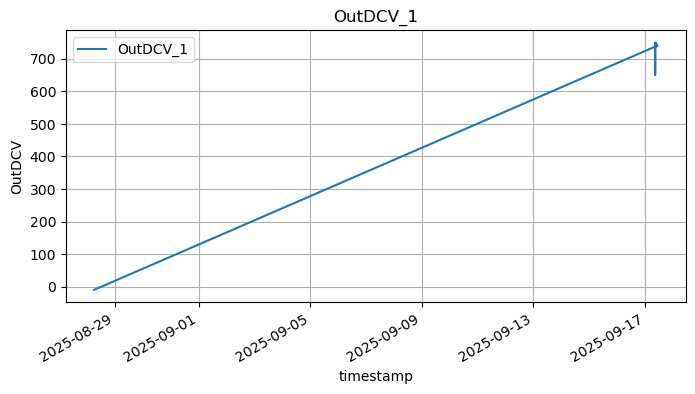

In [28]:
df_OutDCV["OutDCV_1"].plot(figsize=(8,4), title="OutDCV_1")
#plt.xlabel("timestamp")
plt.ylabel("OutDCV")
plt.legend()
plt.grid(True)
# Mettre en évidence les anomalies
plt.scatter(df_OutDCV.loc[df_OutDCV["OutDCV_z_anomaly_1"], "timestamp"], 
            df_OutDCV.loc[df_OutDCV["OutDCV_z_anomaly_1"], "OutDCV_1"], 
            color="red", label="Anomalies", zorder=5)
plt.show()